In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def pandas_plot(ax, df, style_cycle, **kwargs):
    """
    Plot a pandas DataFrame

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to plot to

    df : pd.DataFrame
        The data to plot

    style_cycle : Cycler
        Something that when iterated over yields style dict

    Returns
    -------
    ret : dict
        Dictionary of line2d artists added 
    """
    ret = {}
    x = df.index
    for n, sty in zip(df.columns, style_cycle):
        sty.update(kwargs)
        ln, = ax.plot(x, df[n], label=n, **sty)
        ret[n] = ln
    ax.legend()
    return ret

In [2]:
from IPython.html.widgets import *
from IPython.display import display

def widget_function_factory(arts):
    """
    Generate fulnction + args to pass to interactive
    Parameters
    ----------
    arts : dict
        dictionary of Line2D
        
    """
    
    name = Dropdown(options=list(arts.keys()))
        
    def set_all(_, old_line, new_line):
        ln = arts[new_line]
        lw.value = ln.get_lw()
        alph.value = ln.get_alpha() or 1
        visible.value = ln.get_visible()
        markevery.value = ln.get_markevery()
        marker.value = ln.get_marker()
        
    def set_lw(_, old_lw, new_lw):
        ln = arts[name.value]
        arts[name.value].set_lw(new_lw)
        arts[name.value].axes.legend()
        
    def set_alpha(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_alpha(new_value)
        ln.axes.legend()
        
    def set_visible(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_visible(new_value)
        ln.axes.legend()
        
    def set_markevery(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_markevery(new_value)
        
    def set_marker(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_marker(new_value)
        ln.axes.legend()
        
    lw = FloatSlider(min=1, max=5, description='lw: ')
    alph = FloatSlider(min=0, max=1, description='alpha: ')
    visible = Checkbox(description='visible: ')
    markevery = IntSlider(min=1, max=15, description='markevery: ')
    marker = Dropdown(options={v:k for k, v in matplotlib.markers.MarkerStyle.markers.items()},
                     description='marker: ')
    
    name.on_trait_change(set_all, 'value')
    lw.on_trait_change(set_lw, 'value')
    alph.on_trait_change(set_alpha, 'value')
    visible.on_trait_change(set_visible, 'value')
    markevery.on_trait_change(set_markevery, 'value')
    marker.on_trait_change(set_marker, 'value')
    display(name, lw, alph, marker, markevery, visible)
    set_all(None, None, name.value)
        

/home/tcaswell/.virtualenvs/dd_35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>


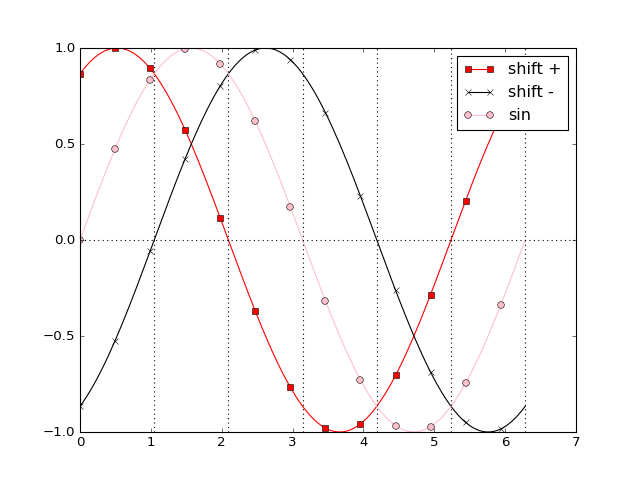

In [4]:
th = np.linspace(0, 2*np.pi, 128)
df = pd.DataFrame({'sin': np.sin(th),
                   'shift +': np.sin(th + np.pi / 3), 
                   'shift -': np.sin(th - np.pi / 3)}, index=th)

fig, ax = plt.subplots()
from cycler import cycler
style_cycle = cycler('color',['r', 'black', 'pink']) + cycler('marker', 'sxo')
#style_cycle = [{'color': 'r', 'marker': 's'},
#               {'color': 'black', 'marker': 'x'},
#               {'color': 'pink', 'marker': 'o'}]
arts = pandas_plot(ax, df, style_cycle, markevery=10)
vlns = []
for x in np.arange(1, 7) * np.pi/3:
    vlns.append(plt.axvline(x, color='k', linestyle=':'))
plt.axhline(0, color='k', linestyle=':')

In [5]:
widget_function_factory(arts)